<a href="https://colab.research.google.com/github/pherathm/DATA110/blob/main/DATA201_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Piushani Ellegala
DATA201
Project 1**

#**Supermarket Sales Data Analysis**

**1. Introduction**

In this project, I am going to analyze a dataset from a supermarket sales environment. The data contains information about various sales transactions, including the product details, total amount spent, and more. By applying Exploratory Data Analysis principles, I will gain insights into the sales trends and make nonparametric inferences based on the dataset. The dataset is publicly available on GitHub, and it contains more than 1000 rows and 17 columns as mentioned follows.

** Source of the Data: **

https://github.com/sersun/supermarket-sales-analysis/blob/main/supermarket_sales.csv


**Content of the Data:**


Invoice ID: Unique identifier for each transaction.

Branch: The supermarket branch where the transaction occurred.

City: The city where the supermarket is located.

Customer Type: Type of customer (e.g., Member or Non-Member).

Gender: Gender of the customer.

Product Line: The category of products purchased (e.g., Food, Electronic, etc.).

Quantity: The number of items purchased.

Unit Price: The price per unit of the product.

Total: The total value of the purchase for the transaction.

**Questions of Interest**

1. What are the trends in sales across different branches, cities, and customer types?

2. How do different product lines contribute to overall sales?

3. Can we identify patterns in the total sales across different categories (such as gender or customer type)?

4. What is the distribution of total sales, and how do these distributions compare across different segments?

5. How does sales performance change over time (e.g., by month or year)?

6. Are there differences in sales based on payment methods (e.g., Cash vs Credit card vs Ewallet)? CODES and answers for above questions

**2. 2. Prepare and Wrangle the Data with Pandas and Numpy**

1. Loading the Data Set

In [3]:
import pandas as pd

# Load the dataset from GitHub
url = 'https://raw.githubusercontent.com/sersun/supermarket-sales-analysis/main/supermarket_sales.csv'
df = pd.read_csv(url)

# Display the first few rows of the dataset
df.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


2. Data Inspection and Cleaning

I will inspect the data to check for missing values, data types, and other inconsistencies.

In [3]:
# Check the data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [4]:
# Check for missing values
df.isnull().sum()



,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0


In [5]:
# Convert 'Total' column to numeric in case there are any inconsistencies
df['Total'] = pd.to_numeric(df['Total'], errors='coerce')

In [6]:
# Check how many values became NaN after conversion
print("Number of NaN values in 'Total' after conversion:", df['Total'].isna().sum())

Number of NaN values in 'Total' after conversion: 0


In [7]:
# Check for duplicates
# Check for duplicates
duplicates = df.duplicated().sum()
print("Number of duplicate rows in the dataset:", duplicates)

Number of duplicate rows in the dataset: 0


**3. 3. Exploratory Data Analysis (EDA)**

Matplotlib and Seaborn packages will be used to explore the dataset and create visualizations.

1. Summary Statistics

In [8]:
# statistical summary of numerical columns
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [9]:
#check the data types
print(df.dtypes)

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object


In [10]:
# Checking for correlations between variables

# For that I selected only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Display correlation matrix
print(correlation_matrix)

                         Unit price  Quantity    Tax 5%     Total      cogs  \
Unit price                 1.000000  0.010778  0.633962  0.633962  0.633962   
Quantity                   0.010778  1.000000  0.705510  0.705510  0.705510   
Tax 5%                     0.633962  0.705510  1.000000  1.000000  1.000000   
Total                      0.633962  0.705510  1.000000  1.000000  1.000000   
cogs                       0.633962  0.705510  1.000000  1.000000  1.000000   
gross margin percentage         NaN       NaN       NaN       NaN       NaN   
gross income               0.633962  0.705510  1.000000  1.000000  1.000000   
Rating                    -0.008778 -0.015815 -0.036442 -0.036442 -0.036442   

                         gross margin percentage  gross income    Rating  
Unit price                                   NaN      0.633962 -0.008778  
Quantity                                     NaN      0.705510 -0.015815  
Tax 5%                                       NaN      1.000000 

2. Visualizing the Data

**1. Distribution of Total Sales (Histogram)**

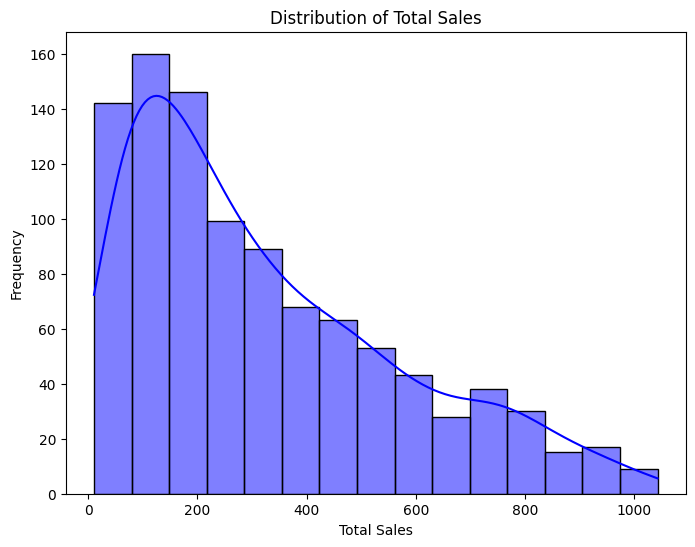

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(df['Total'], kde=True, color='blue')
plt.title("Distribution of Total Sales")
plt.xlabel("Total Sales")
plt.ylabel("Frequency")
plt.show()


The distribution of total sales in this dataset is right-skewed, which means that most sales are small to medium, and only a few sales are very large.  The big purchases don’t happen often but still affect the overall numbers. To understand this better, I have used a KDE (Kernel Density Estimate) plot along with a histogram.

**2.Sales by Product Line (Barplot)**

<ipython-input-12-c6bd8ca93e9d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product line', y='Total', data=df, palette='viridis')


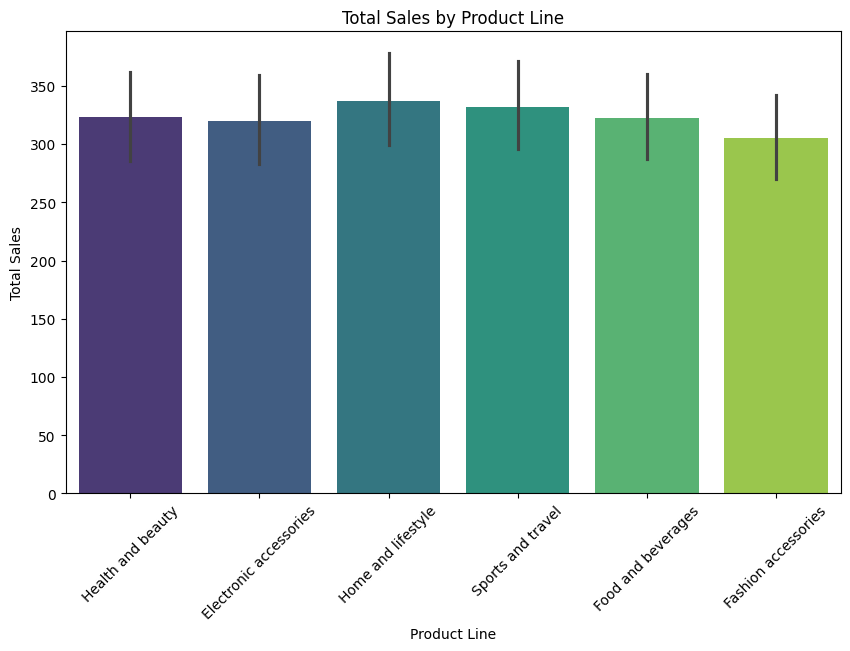

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Product line', y='Total', data=df, palette='viridis')
plt.title("Total Sales by Product Line")
plt.xticks(rotation=45)
plt.xlabel("Product Line")
plt.ylabel("Total Sales")
plt.show()


The Home and Life Style and Sports and Travel product lines usually contribute the most to the overall revenue.



**3.Sales by Gender (Boxplot)**

<ipython-input-13-bf9d498d60b9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Total', data=df, palette='Set2')


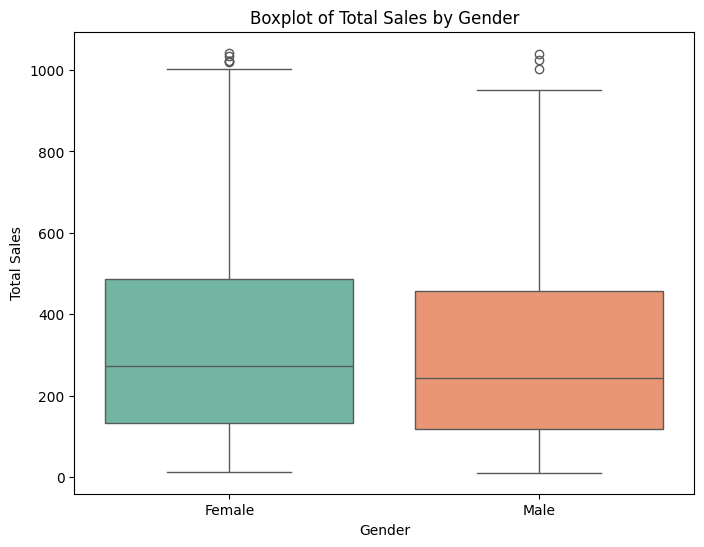

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Total', data=df, palette='Set2')
plt.title("Boxplot of Total Sales by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Sales")
plt.show()


The boxplot of sales by gender shows that female customers usually spend more than male customers. The median for females is higher, meaning half of the female sales are more than that amount, and it's more than the males’ median. Also, the spread of female spending is wider, showing more variety in how much they spend. Overall, this means females bring in more sales than males in this dataset.

**4. Total Sales by Product Line and Gender**

<ipython-input-4-fd602ee29491>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Product line', y='Total', hue='Gender', data=df, ci=None, estimator=sum, palette='viridis')


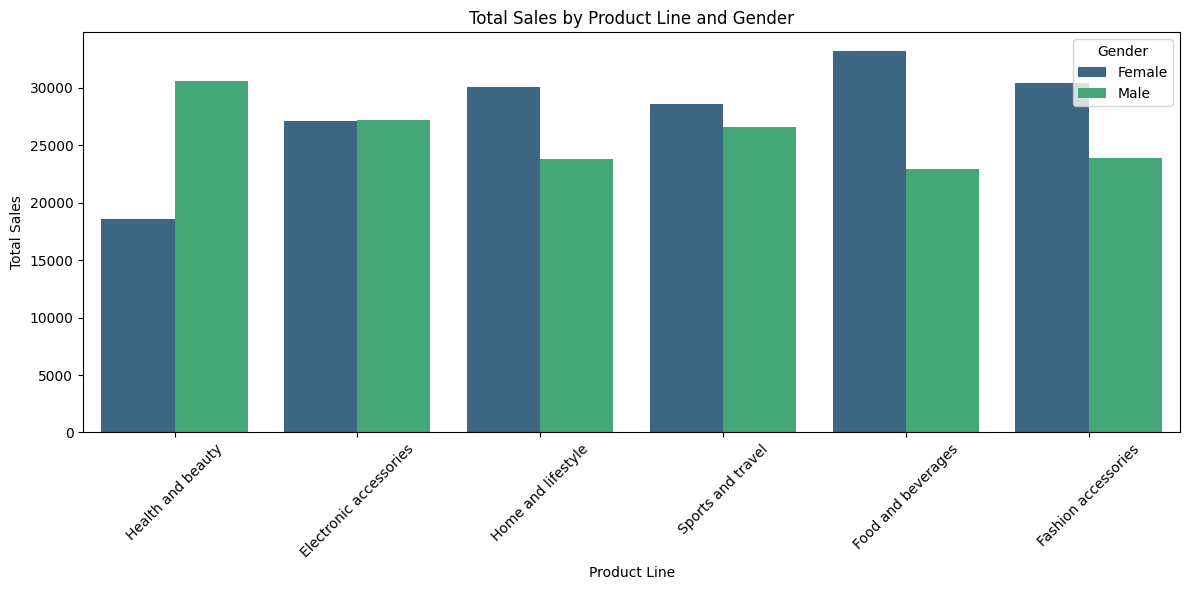

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='Product line', y='Total', hue='Gender', data=df, ci=None, estimator=sum, palette='viridis')
plt.title("Total Sales by Product Line and Gender")
plt.xlabel("Product Line")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


When I look at sales by product line and gender together, I can see how male and female customers spend across different types of products. In most product lines, female customers tend to spend more than males, especially in categories like Fashion accessories, Home and lifestyle, and Food and beverages. Some product lines may show similar spending between genders, but overall, females contribute slightly more to total sales. This helps businesses understand which groups prefer certain products.

**5.Distribution of Total Sales by Payment Method**

<ipython-input-5-cfbc2ac68e9f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Payment', y='Total', data=df, palette='coolwarm')


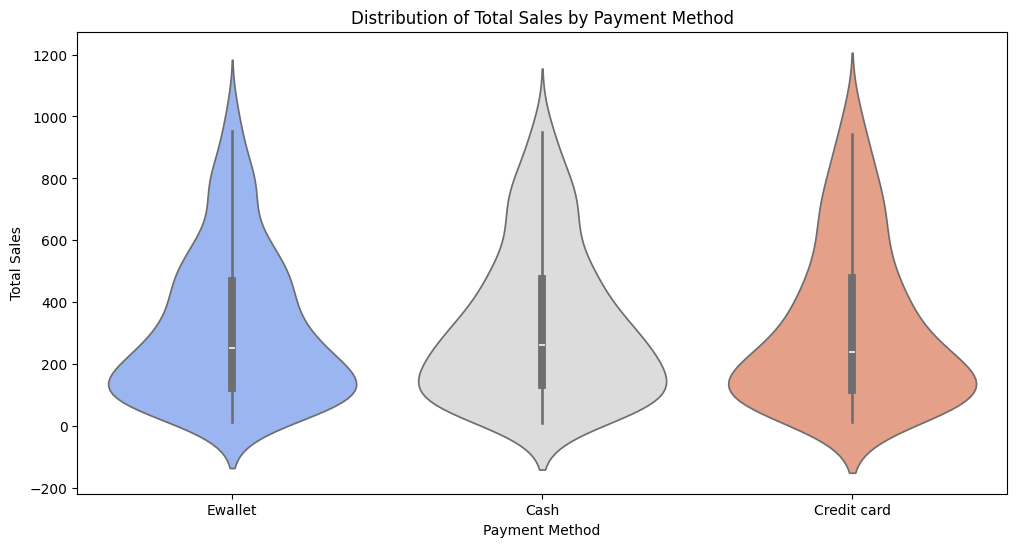

In [5]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Payment', y='Total', data=df, palette='coolwarm')
plt.title("Distribution of Total Sales by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Total Sales")
plt.show()


The violin plot shows how total sales are distributed for Ewallet, Cash, and Credit Card payments. All three methods have a similar range of sales, reaching up to about 1000 in value. For all payment methods, most transactions are concentrated around 100 to 300 in total sales. The median for each is almost in the same spot, suggesting that the average sale doesn't vary much by payment method. However, Ewallet seems to have slightly more variety in smaller purchases.

**6. Pairplot - Income, Total Spend, Purchase Quantity and Unit Price**

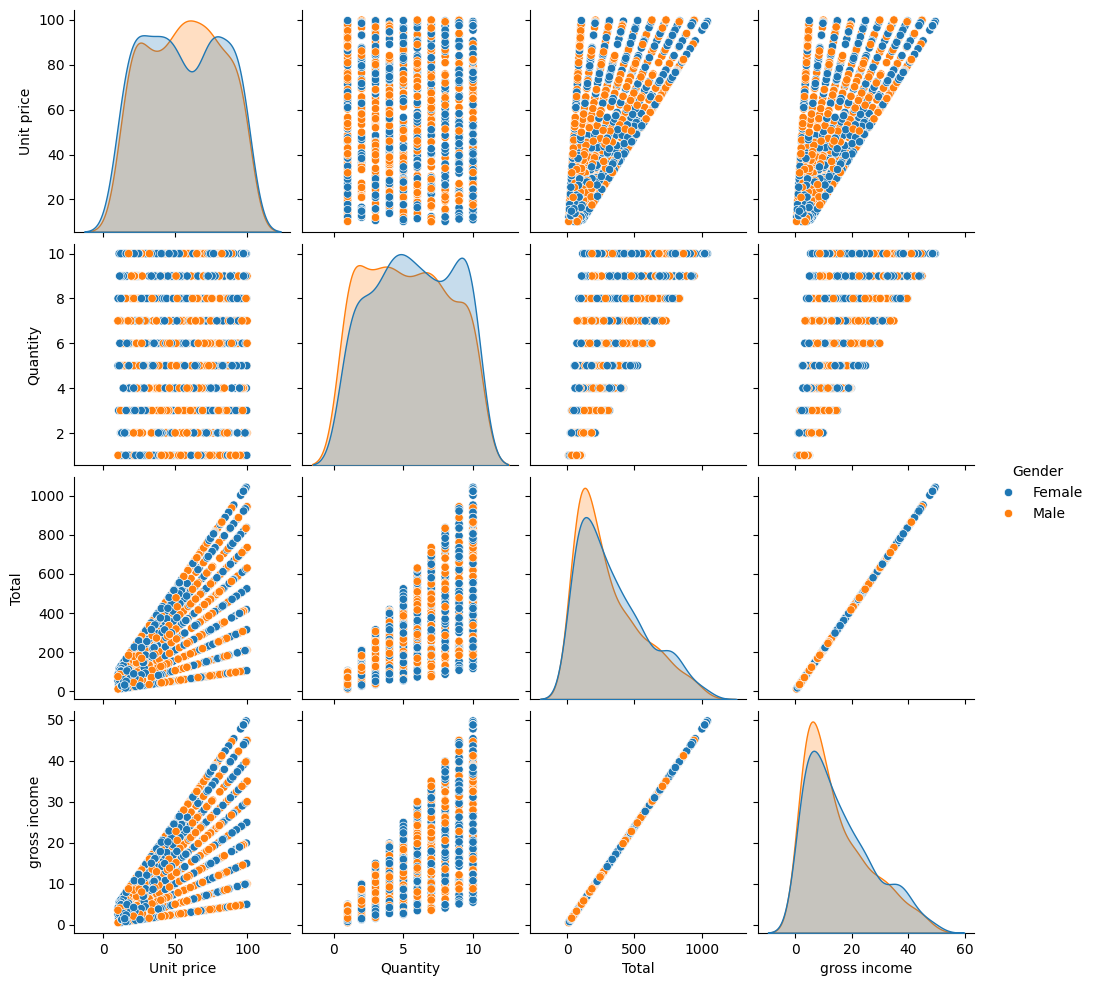

In [15]:
sns.pairplot(df, vars=['Unit price', 'Quantity', 'Total', 'gross income'], hue='Gender')

A strong positive correlation between 'gross income' and 'Total' means that people with higher incomes tend to spend more. This is because they have more money to buy things. However, if 'Quantity' and 'Unit price' are not strongly related, it means that the amount of items people buy doesn't depend much on the price of each item. This suggests that customers may make purchases based on other factors, like need or personal preferences, rather than just the price.

**5.  Simulate a Nonparametric Inference of the Median - Total Sales**

Bootstrapping will be performed to estimate the population median of the Total sales using nonparametric inference.

Steps taken:

1. Randomly sample 10% of the dataset.

2. Take 1000 random resamples of the data and calculate the median of each.

3. Calculate the 95% confidence interval for the median.

In [6]:
import numpy as np

# select a sample of 10% of the data
sample_df = df.sample(frac=0.1, random_state=42)

# Bootstrapping
bootstrap_medians = []
for _ in range(1000):
    bootstrap_sample = sample_df['Total'].sample(frac=1, replace=True)
    bootstrap_medians.append(bootstrap_sample.median())




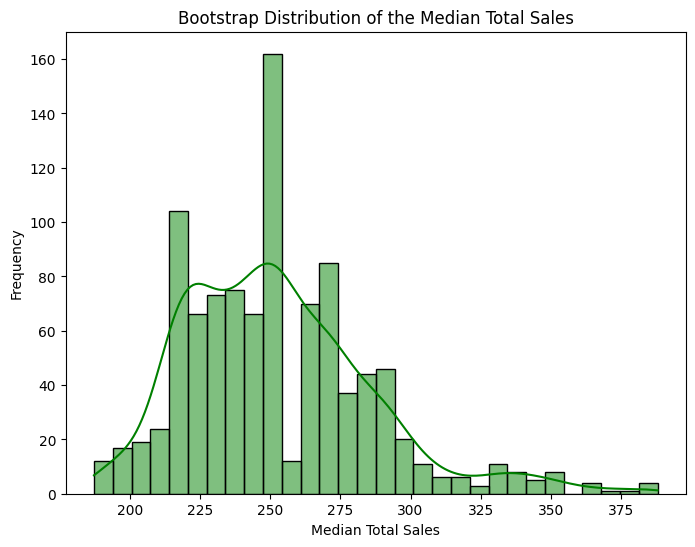

In [7]:
# Plot the bootstrap distribution of medians
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(bootstrap_medians, kde=True, bins=30, color='green')
plt.title("Bootstrap Distribution of the Median Total Sales")
plt.xlabel("Median Total Sales")
plt.ylabel("Frequency")
plt.show()

The histogram shows the distribution of median values obtained with replacement from 10% sample. The distribution appears right skewed, with the majority of medians clustering between 200 and 300, and a tail extends to higher values.



In [8]:
# Calculate the 95% Confidence Interval for the Median
lower_ci = np.percentile(bootstrap_medians, 2.5)
upper_ci = np.percentile(bootstrap_medians, 97.5)

# Print the results
print(f"Median of the 10% sample: {sample_df['Total'].median()}")
print(f"95% Confidence Interval for the Median: ({lower_ci}, {upper_ci})")

Median of the 10% sample: 250.06275
95% Confidence Interval for the Median: (198.60093750000001, 339.717)


The median of the 10% sample is 250.06, which suggests that half of the values in this sample are below this point and half are above. Since the sample is a smaller subset (10%) of the total population, the median reflects the central value for that sample rather than the entire dataset, but it still offers insight into the overall distribution.

The 95% Confidence Interval for the median is (198.60, 339.72). This interval suggests some variability in the sample medians and implies that while the sample median is 250.06, the true population median could reasonably be anywhere between 198.60 and 339.72.